Predicted weight for 165 cm: 58.71 kg


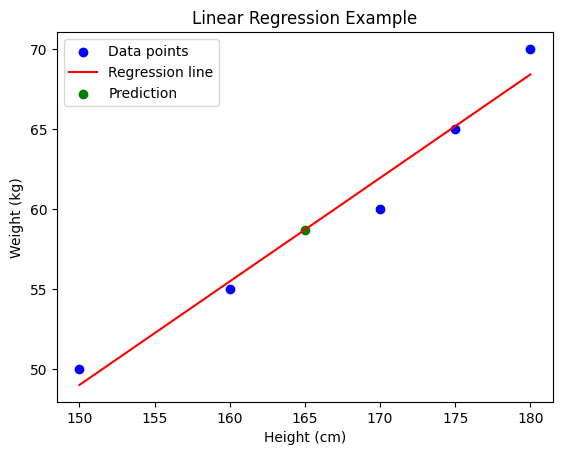

In [1]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Sample data: heights (cm) and weights (kg)
heights = np.array([[150], [160], [170], [175], [180]])  # 2D array for scikit-learn
weights = np.array([50, 55, 60, 65, 70])                 # 1D array for target

# Create and train the model
model = LinearRegression()
model.fit(heights, weights)

# Make a prediction
new_height = np.array([[165]])  # Predict weight for 165 cm
predicted_weight = model.predict(new_height)
print(f"Predicted weight for 165 cm: {predicted_weight[0]:.2f} kg")

# Visualize the data and regression line
plt.scatter(heights, weights, color='blue', label='Data points')
plt.plot(heights, model.predict(heights), color='red', label='Regression line')
plt.scatter(new_height, predicted_weight, color='green', label='Prediction')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Linear Regression Example')
plt.legend()
plt.show()


2025-03-23 05:02:49.638481: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-23 05:02:49.653347: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-23 05:02:49.819272: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-23 05:02:49.962949: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742706170.091214   58259 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742706170.13

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/opt/conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-23 05:02:56.403484: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8946 - loss: 0.3621
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9833 - loss: 0.0572
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9888 - loss: 0.0379
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9938 - loss: 0.0229
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9943 - loss: 0.0193
Test accuracy: 0.9842
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Predicted digit for sample image: 7


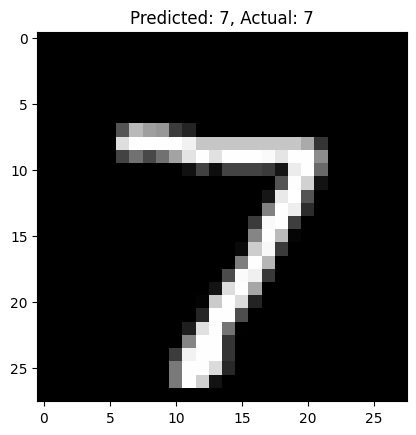

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)     # Reshape for the model (28x28 images, 1 channel)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build the neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    layers.MaxPooling2D((2, 2)),                                           # Pooling layer
    layers.Flatten(),                                                      # Flatten to 1D
    layers.Dense(128, activation='relu'),                                  # Fully connected layer
    layers.Dense(10, activation='softmax')                                 # Output layer (10 digits)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Make a prediction on a single test image
sample_image = x_test[0:1]  # Take the first test image
prediction = model.predict(sample_image)
predicted_digit = np.argmax(prediction)
print(f"Predicted digit for sample image: {predicted_digit}")

# Visualize the sample image
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_digit}, Actual: {y_test[0]}")
plt.show()

In [2]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Sample data: [weight (grams), texture (0=smooth, 1=rough)]
X = np.array([[150, 0], [170, 0], [130, 1], [140, 1]])  # Features
y = np.array([1, 1, 0, 0])                               # Labels: 1=apple, 0=orange

# Create and train the model
model = DecisionTreeClassifier()
model.fit(X, y)

# Predict for a new fruit: [160 grams, smooth]
new_fruit = np.array([[160, 0]])
prediction = model.predict(new_fruit)
print(f"Predicted class: {'apple' if prediction[0] == 1 else 'orange'}")

# Accuracy on training data (for demo)
accuracy = model.score(X, y)
print(f"Training accuracy: {accuracy:.2f}")

Predicted class: apple
Training accuracy: 1.00


2025-03-23 05:13:55.215863: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-23 05:13:55.219175: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-23 05:13:55.229651: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-23 05:13:55.248658: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742706835.277418   67338 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742706835.28

Epoch 1/20


2025-03-23 05:13:57.895684: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3794
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0979
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0564
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0012
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6391e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.6555e-04
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4922e-04
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4616e-04
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1102e-04
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1061e-04
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6869e-04
Ep

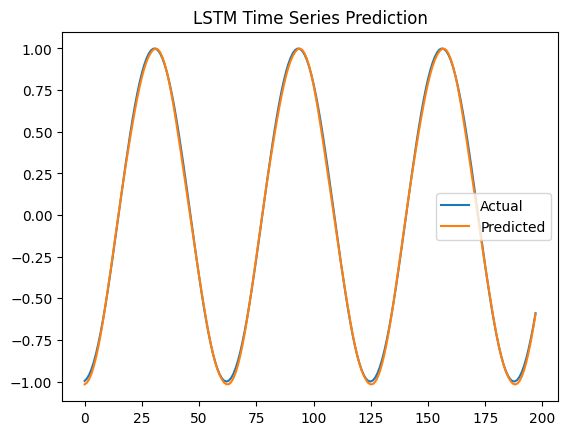

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted next value: -1.0169, Actual: -0.9960


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Generate synthetic time series data (sine wave)
t = np.arange(0, 100, 0.1)
data = np.sin(t)
sequence_length = 10

# Prepare data: predict next value based on previous 10
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length])
X = np.array(X).reshape(-1, sequence_length, 1)  # Shape: (samples, timesteps, features)
y = np.array(y)

# Split into train and test
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = models.Sequential([
    layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1)),
    layers.Dense(1)  # Predict one value
])

# Compile and train
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict on test data
predictions = model.predict(X_test)

# Plot results
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Time Series Prediction')
plt.legend()
plt.show()

# Example prediction
sample = X_test[0:1]
pred = model.predict(sample)
print(f"Predicted next value: {pred[0][0]:.4f}, Actual: {y_test[0]:.4f}")

ML Predicted price for 1600 sq ft, 3 bedrooms: 197.36 thousand $


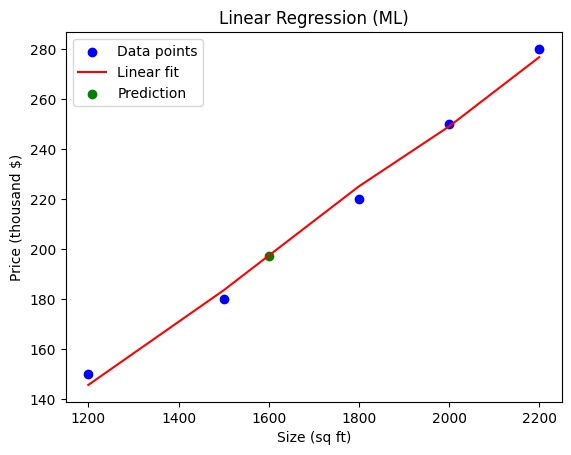

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1200, 2], [1500, 3], [1800, 3], [2000, 4], [2200, 4]])  # [size, bedrooms]
y = np.array([150, 180, 220, 250, 280])                                # price

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Predict for a new house: [1600 sq ft, 3 bedrooms]
new_house = np.array([[1600, 3]])
predicted_price = model.predict(new_house)
print(f"ML Predicted price for 1600 sq ft, 3 bedrooms: {predicted_price[0]:.2f} thousand $")

# Visualize (using size as x-axis)
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], model.predict(X), color='red', label='Linear fit')
plt.scatter(1600, predicted_price, color='green', label='Prediction')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (thousand $)')
plt.title('Linear Regression (ML)')
plt.legend()
plt.show()

/opt/conda/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


DL Predicted price for 1600 sq ft, 3 bedrooms: 199.49 thousand $


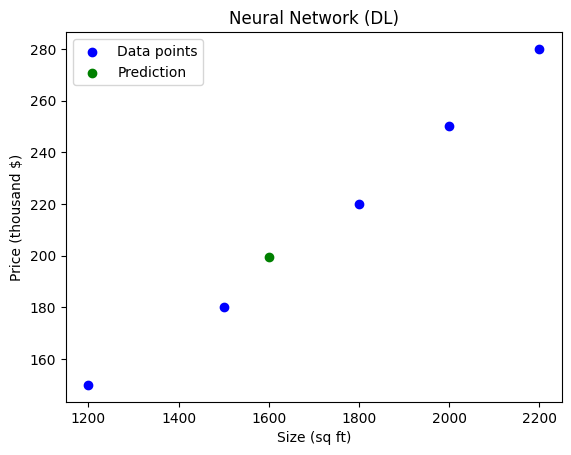

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Sample data (same as ML)
X = np.array([[1200, 2], [1500, 3], [1800, 3], [2000, 4], [2200, 4]], dtype='float32')
y = np.array([150, 180, 220, 250, 280], dtype='float32')

# Build the neural network
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),  # Hidden layer with 64 neurons
    layers.Dense(32, activation='relu'),                   # Another hidden layer
    layers.Dense(1)                                        # Output layer (price)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=100, verbose=0)  # 100 epochs, silent training

# Predict for the same new house: [1600 sq ft, 3 bedrooms]
new_house = np.array([[1600, 3]], dtype='float32')
predicted_price = model.predict(new_house, verbose=0)
print(f"DL Predicted price for 1600 sq ft, 3 bedrooms: {predicted_price[0][0]:.2f} thousand $")

# Visualize (using size as x-axis)
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.scatter(1600, predicted_price, color='green', label='Prediction')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (thousand $)')
plt.title('Neural Network (DL)')
plt.legend()
plt.show()